In [1]:
#Importing Libraries
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])


c:\Users\arzuh\anaconda3\envs\data_analytics\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
dataset = load_dataset('lukebarousse/data_jobs')
df_original = dataset['train'].to_pandas()

In [2]:
df.sample(10)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
636662,Data Analyst,Data Analyst,"Paris, France",via BeBee,Full-time,False,France,2023-05-13 12:49:26,False,False,France,None,NaN,NaN,CNSA,['r'],{'programming': ['r']}
42518,Data Engineer,Data Engineer,"Buenos Aires, Argentina","via Trabajo.org - Vacantes De Empleo, Trabajo",Full-time,False,Argentina,2023-11-07 06:33:51,True,False,Argentina,None,NaN,NaN,Emprego,"['sql', 'python', 'powershell', 'sql server', ...","{'cloud': ['azure'], 'databases': ['sql server..."
773984,Data Scientist,Títolo Data Scientist,Italy,via Trabajo. Org,Full-time and Temp work,False,Italy,2023-10-22 01:14:42,False,False,Italy,None,NaN,NaN,Confidenziale,"['python', 'gcp', 'pandas', 'numpy', 'tensorfl...","{'cloud': ['gcp'], 'libraries': ['pandas', 'nu..."
83769,Data Analyst,2024 university graduate data analyst research...,Puerto Rico,via Sercanto,Full-time,False,Puerto Rico,2023-09-05 00:28:37,True,False,Puerto Rico,None,NaN,NaN,Jobzem (3694783),['tableau'],{'analyst_tools': ['tableau']}
659169,Data Analyst,Apprentissage - BAC+5 - Data Analyst Véhicules...,"Le Plessis-Robinson, France",via Indeed,Full-time,False,France,2023-04-04 10:40:03,False,False,France,None,NaN,NaN,Renault Group,"['vue', 'tableau', 'powerpoint']","{'analyst_tools': ['tableau', 'powerpoint'], '..."
404969,Business Analyst,Red Analyst Jobs,"Albuquerque, NM",via Clearance Jobs,Contractor,False,Sudan,2023-02-23 16:42:50,True,True,Sudan,None,NaN,NaN,"RMGS, Inc.",['powerpoint'],{'analyst_tools': ['powerpoint']}
719268,Software Engineer,Systeem Tester,"Eindhoven, Netherlands",via BeBee,Full-time,False,Netherlands,2023-12-08 21:28:06,False,False,Netherlands,None,NaN,NaN,TMC Group,None,None
750767,Data Engineer,Senior Staff Data Engineer,"Vienna, Austria",via BeBee,Full-time,False,Austria,2023-03-01 21:06:06,False,False,Austria,None,NaN,NaN,Turing,"['python', 'kotlin', 'scala', 'go', 'java', 'c...","{'cloud': ['aws'], 'databases': ['cassandra'],..."
267112,Data Analyst,Practicante Data y Analytics,Chile,via BeBee,Full-time and Internship,False,Chile,2023-09-28 07:58:08,False,False,Chile,None,NaN,NaN,Falabella,"['python', 'sql', 'gcp', 'excel']","{'analyst_tools': ['excel'], 'cloud': ['gcp'],..."
393255,Data Analyst,Analista de datos,"Santo Domingo, Dominican Republic",via LinkedIn República Dominicana,Full-time,False,Dominican Republic,2023-07-10 18:56:59,False,False,Dominican Republic,None,NaN,NaN,Cervecería Nacional Dominicana,"['sql', 'python', 'r']","{'programming': ['sql', 'python', 'r']}"


In [9]:
df.pivot_table(values='salary_year_avg', index='job_country', columns='job_title_short',aggfunc= 'median')

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_country,,,,,,,,,,
Albania,NaN,NaN,49950.00,NaN,69981.25,NaN,NaN,NaN,157500.0,NaN
Algeria,NaN,NaN,44100.00,45000.0,NaN,NaN,NaN,NaN,NaN,NaN
Argentina,71100.0,197500.0,92771.75,96773.0,71000.00,101029.0,NaN,147500.0,NaN,174500.0
Armenia,NaN,NaN,100500.00,48750.0,NaN,87021.0,NaN,NaN,NaN,NaN
Australia,70000.0,110000.0,109500.00,106712.5,139216.00,101029.0,50640.0,147500.0,157500.0,118350.0
...,...,...,...,...,...,...,...,...,...,...
Uruguay,NaN,NaN,100500.00,NaN,NaN,50000.0,NaN,NaN,57500.0,NaN
Uzbekistan,NaN,NaN,NaN,NaN,30750.00,NaN,NaN,NaN,NaN,NaN
Vietnam,79200.0,NaN,75550.00,96773.0,70000.00,57600.0,105837.5,147500.0,79200.0,53600.0


<Axes: xlabel='job_country'>

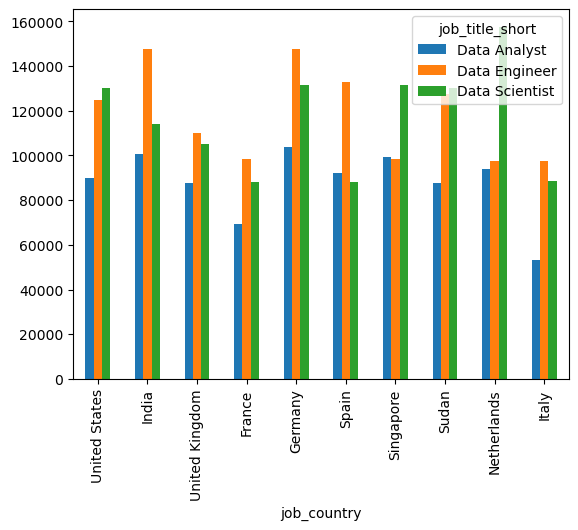

In [22]:
top_countries = df['job_country'].value_counts().head(10).index
top_countries

df_job_country_salary = df.pivot_table(
    values='salary_year_avg',
    index= 'job_country',
    columns = 'job_title_short',
    aggfunc='median'
)

df_job_country_salary = df_job_country_salary.loc[top_countries]
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']
df_job_country_salary = df_job_country_salary[job_titles]

df_job_country_salary.plot(kind='bar')